In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import missingno as msno

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

#Set Max Columns
pd.set_option('display.max_columns', None)

#Save Model
import pickle

In [2]:
df = pd.read_csv("data_bike_sharing.csv", low_memory=False) #increase effeciency
df_backup = pd.read_csv("data_bike_sharing.csv")
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [3]:
#Count and Datatype for Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Data Cleaning (Missing Values, Outliers, Duplicate Values)

In [15]:
#Mengubah kolom 'claim' (target) menjadi nilai 0 untuk tidak claim dan 1 untuk yang Claim
import numpy as np
import pandas as pd
df = pd.DataFrame({'Claim': ['Yes', 'No', 'Yes', 'No']})
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)

In [6]:
#Mengubah Nama Kolom "Commission" (in value) Menjadi "Commision" (tanpa in value)
##Tidak Pakai
df = df.rename(columns={'Commission (in value)': 'Commision'})

In [7]:
#Mengubah nama kolom 'Commision' (tanpa in values)
df = df.rename(columns = {'Commision (in value)':'Commision'})
df

,Claim
0,1
1,0
2,1
3,0


In [8]:
# Mengatur opsi tampilan
pd.set_option('display.max_colwidth', None)

# Membuat list untuk menyimpan informasi kolom
listItem = []
for col in df.columns: listItem.append([col, str(df[col].dtype), df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2), df[col].nunique(), list(df[col].drop_duplicates().values)])

# Membuat DataFrame dengan kolom yang sesuai
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)

# Menampilkan DataFrame
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim,int64,0,0.0,2,"[1, 0]"


In [10]:
# Menghitung jumlah nilai unik dan persentase nilai yang hilang
unique_counts = df.nunique()
missing_counts = df.isna().sum()
missing_percentage = (missing_counts / len(df)) * 100

# Membuat DataFrame untuk menampilkan hasil
summary = pd.DataFrame({
    'Unique Values': unique_counts,
    'Missing Values': missing_counts,
    'Missing Percentage': missing_percentage
})

# Menampilkan hasil
print(summary)

       Unique Values  Missing Values  Missing Percentage
Claim              2               0                 0.0


In [11]:
# Menampilkan nilai-nilai unik dari setiap kolom
for col in df.columns:
    print(f"Nilai unik untuk kolom {col}:")
    print(df[col].unique())
    print("\n")

Nilai unik untuk kolom Claim:
[1 0]




In [12]:
unique_counts = df.apply(lambda x: x[x >= 0].nunique() if pd.api.types.is_integer_dtype(x) else x.nunique())
print(unique_counts)

Claim    2
dtype: int64


Missing Values

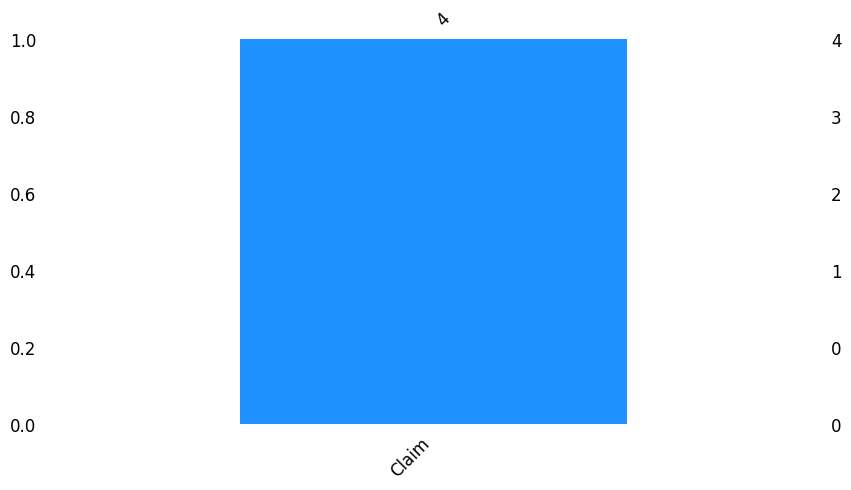

In [13]:
msno.bar(df,color="dodgerblue", sort="ascending",figsize=(10,5), fontsize=12);